In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
k = 1
h = 1
B0 = 1
B1 = 1
w = 1
L = 8
theta_B = 40

nodos = 20

In [3]:
def eficiencia(perfil):
    perfil_prueba = B0*np.ones(nodos)
    P = 2*(perfil+B1+w)
    A = (B1+perfil)*w
    dx = L/nodos

    coeficientes = np.zeros((nodos,nodos))
    coeficientes[0,0] = 1
    coeficientes[-1,-1] = -1
    coeficientes[-1,-2] = 1

    constantes = np.zeros(nodos)
    constantes[0] = theta_B

    for i in range(1,nodos-1):

        coeficientes[i,i] = -2*A[i] - h*P[i]*dx**2/k
        coeficientes[i,i-1] = A[i]-(A[i+1]-A[i-1])/4
        coeficientes[i,i+1] = A[i]+(A[i+1]-A[i-1])/4

    A_inv = np.linalg.inv(coeficientes)
    Thetas = np.matmul(A_inv,constantes)
    
    Q = np.trapz(h*P*Thetas,np.linspace(0,L,nodos))
    Qm = np.trapz(h*P*theta_B,np.linspace(0,L,nodos))
    Eta = Q/Qm
    return Eta

In [11]:
perfil_prueba = B0*np.ones(nodos)
paso = 0.01
cambio = 1

#while cambio > 0.0001:
for j in range(1000):
    gradiente = [0]
    eta = eficiencia(perfil_prueba)
    for i in range(1,nodos):

        perfil_nuevo = perfil_prueba.copy()
        perfil_nuevo[i] += paso
        eta_i = eficiencia(perfil_nuevo)
        nabla_i = (eta_i-eta)
        nabla_i *= (1.*(nabla_i<0))#*(1.*(perfil_nuevo[i]>0))
        gradiente.append(nabla_i)

    gradiente = np.array(gradiente)*10
    #cambio = np.sum(np.square(gradiente))
    perfil_prueba = perfil_prueba+gradiente

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -7.89328866e-05
 -1.42878518e-04 -1.56583003e-04 -1.57051543e-04 -1.55635976e-04
 -1.54522295e-04 -1.53864404e-04 -1.53509574e-04 -1.53325258e-04
 -1.53231146e-04 -1.53183495e-04 -1.53159486e-04 -1.53147474e-04
 -1.53141661e-04 -1.53139499e-04 -1.53134067e-04 -7.65749676e-05]


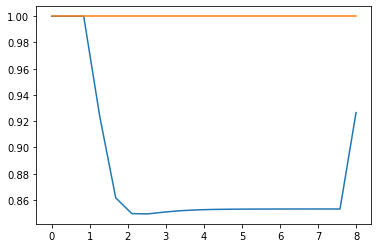

In [12]:
plt.figure()
plt.plot(np.linspace(0,L,20),perfil_prueba)
plt.plot(np.linspace(0,L,20),B0*np.ones(nodos))
#plt.ylim(1.-1E-4,1.+1E-4)
print(gradiente)